In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# read the final aggregated movie data with additional information 
movie_data = pd.read_csv("../data/with_additional_data/military_hollywood_with_additional_data.csv")
movie_data['Media Type'].replace({'OTH': 'TV'}, inplace=True)
movie_data.drop(['directors'], axis=1, inplace=True)

In [3]:
# select the data where we have the genres information and then 
# group by the selected data based on the genres, Media Type and Status information, 
genres_over_years = movie_data.loc[movie_data.genre.notna()].reset_index(drop=True)
genres_over_years = genres_over_years[['genre','Media Type','Status']]

In [4]:
genres_over_years.groupby(['Media Type']).agg('count')

,genre,Status
Media Type,,
FILM,514,514
TV,263,263


In [5]:
genres_over_years_TV = genres_over_years.loc[genres_over_years['Media Type']=='TV'].reset_index(drop=True)
genres_over_years_FILM = genres_over_years.loc[genres_over_years['Media Type']=='FILM'].reset_index(drop=True)

In [6]:
# explode genre columns to multiple rows where it has only more than one type of genre for TV
genres_over_years_TV = pd.concat([pd.Series(row['Status'], row['genre'].split(',')) for _, row in genres_over_years_TV.iterrows()]).reset_index()
# remove leading and ending spaces in genre column (now it is as index)
genres_over_years_TV['index'] = [genre.strip() for genre in genres_over_years_TV['index']]
# explode genre columns to multiple rows where it has only more than one type of genre for FILM
genres_over_years_FILM = pd.concat([pd.Series(row['Status'], row['genre'].split(',')) for _, row in genres_over_years_FILM.iterrows()]).reset_index()
# remove leading and ending spaces in genre column (now it is as index)
genres_over_years_FILM['index'] = [genre.strip() for genre in genres_over_years_FILM['index']]

In [7]:
genres_over_years_TV.rename(columns = {'index': 'genre', 0: 'Status'}, inplace = True)
genres_over_years_FILM.rename(columns = {'index': 'genre', 0: 'Status'}, inplace = True)

In [8]:
# then count the movies of corresponding groupings for TV
genres_over_years_TV_grouped = genres_over_years_TV.groupby(['Status', 'genre']).agg({'Status':'count'})
# rename the aggregated column as Number of Movies
genres_over_years_TV_grouped.rename(columns = {'Status': 'Number of Movies'}, inplace = True)
# reset the index
genres_over_years_TV_grouped= genres_over_years_TV_grouped.reset_index()
# calculate number of the movies per status 
sum_per_status_TV = genres_over_years_TV_grouped.groupby('Status').agg({'Number of Movies':'sum'}).reset_index()
# show the percentage of the movies' genres by grouped sum over the STATUS
genres_over_years_TV_grouped = genres_over_years_TV_grouped.merge(sum_per_status_TV, on='Status', how='left', suffixes=('', '_y'))
# rename the aggregated column
genres_over_years_TV_grouped.rename(columns = {'Number of Movies_y': 'Sum of Movies over Status'}, inplace = True)
genres_over_years_TV_grouped['percentage'] = round(100*genres_over_years_TV_grouped['Number of Movies']/genres_over_years_TV_grouped['Sum of Movies over Status'],2)
genres_over_years_TV_grouped

,Status,genre,Number of Movies,Sum of Movies over Status,percentage
0,APP,Action,113,585,19.32
1,APP,Adventure,14,585,2.39
2,APP,Biography,9,585,1.54
3,APP,Comedy,11,585,1.88
4,APP,Crime,66,585,11.28
5,APP,Documentary,4,585,0.68
6,APP,Drama,172,585,29.40
7,APP,Family,12,585,2.05
8,APP,Fantasy,3,585,0.51
9,APP,History,7,585,1.20


In [9]:
# do the same for FILM
# then count the movies of corresponding groupings for FILM
genres_over_years_FILM_grouped = genres_over_years_FILM.groupby(['Status', 'genre']).agg({'Status':'count'})
# rename the aggregated column as Number of Movies
genres_over_years_FILM_grouped.rename(columns = {'Status': 'Number of Movies'}, inplace = True)
# reset the index
genres_over_years_FILM_grouped= genres_over_years_FILM_grouped.reset_index()
# calculate number of the movies per status 
sum_per_status_FILM = genres_over_years_FILM_grouped.groupby('Status').agg({'Number of Movies':'sum'}).reset_index()
# show the percentage of the movies' genres by grouped sum over the STATUS
genres_over_years_FILM_grouped = genres_over_years_FILM_grouped.merge(sum_per_status_FILM, on='Status', how='left', suffixes=('', '_y'))
# rename the aggregated column
genres_over_years_FILM_grouped.rename(columns = {'Number of Movies_y': 'Sum of Movies over Status'}, inplace = True)
genres_over_years_FILM_grouped['percentage'] = round(100*genres_over_years_FILM_grouped['Number of Movies']/genres_over_years_FILM_grouped['Sum of Movies over Status'],2)
genres_over_years_FILM_grouped

,Status,genre,Number of Movies,Sum of Movies over Status,percentage
0,APP,Action,105,880,11.93
1,APP,Adventure,56,880,6.36
2,APP,Animation,1,880,0.11
3,APP,Biography,27,880,3.07
4,APP,Comedy,43,880,4.89
...,...,...,...,...,...
72,OTH,Sci-Fi,5,151,3.31
73,OTH,Thriller,9,151,5.96
74,OTH,War,26,151,17.22
75,RSCH,Action,1,2,50.00


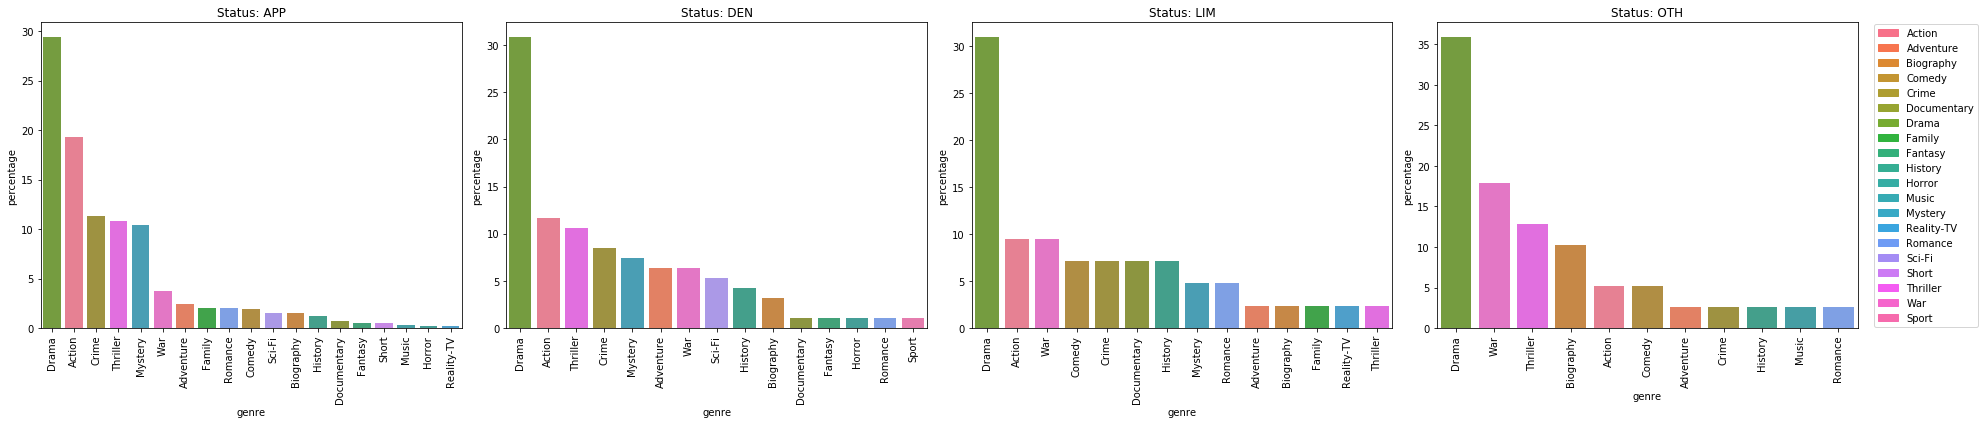

In [40]:
# visualise FOR TV
from matplotlib.patches import Patch
import matplotlib.pyplot as plt


# create a color map for unique values or genres
genre_cat = genres_over_years_TV_grouped.genre.unique()
colors = sns.color_palette('husl', n_colors=len(genre_cat))
cmap = dict(zip(genre_cat, colors))

# plot a subplot for each status
plt.figure(figsize=(26, 6))
for i, tod in enumerate(genres_over_years_TV_grouped.Status.unique(), 1):
    data = genres_over_years_TV_grouped[genres_over_years_TV_grouped.Status == tod].sort_values(['percentage'], ascending=False)
    plt.subplot(1, 4, i)
    p = sns.barplot(x='genre', y='percentage', data=data, hue='genre', palette=cmap, dodge=False)
    p.legend_.remove()
    plt.xticks(rotation=90)
    plt.title(f'Status: {tod}')

plt.tight_layout()
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
plt.show()

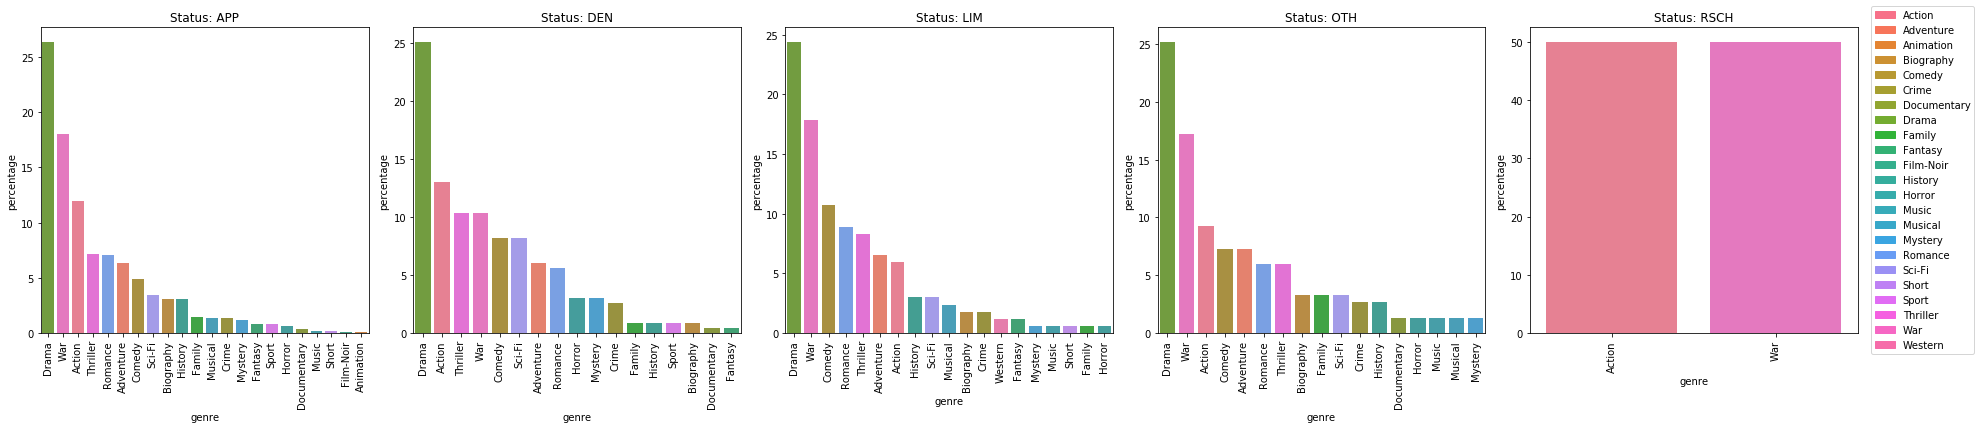

In [37]:
# visualise FOR FILM
# create a color map for unique values or genres
genre_cat = genres_over_years_FILM_grouped.genre.unique()
colors = sns.color_palette('husl', n_colors=len(genre_cat))
cmap = dict(zip(genre_cat, colors))

# plot a subplot for each status
plt.figure(figsize=(26, 6))
for i, tod in enumerate(genres_over_years_FILM_grouped.Status.unique(), 1):
    data = genres_over_years_FILM_grouped[genres_over_years_FILM_grouped.Status == tod].sort_values(['percentage'], ascending=False)
    plt.subplot(1, 5, i)
    p = sns.barplot(x='genre', y='percentage', data=data, hue='genre', palette=cmap, dodge=False)
    p.legend_.remove()
    plt.xticks(rotation=90)
    plt.title(f'Status: {tod}')

plt.tight_layout()
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
plt.show()